In [ ]:

Task 7: Dimensionality Reduction & Stock Price Prediction

In [ ]:
Part 1: Dimensionality Reduction

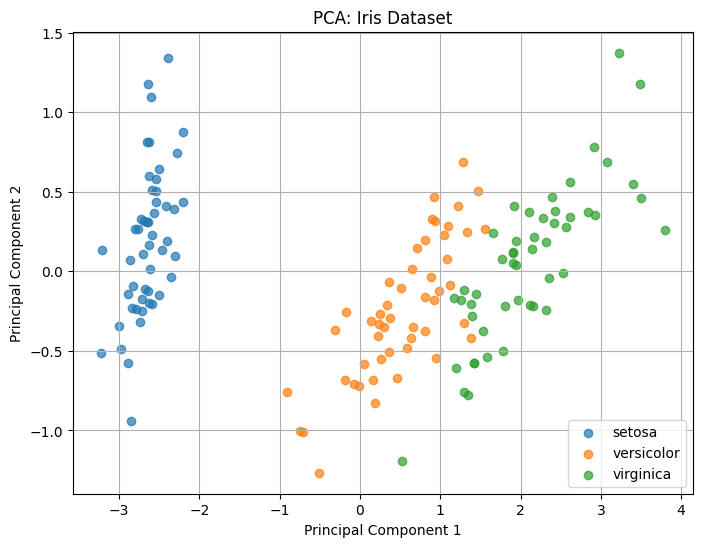

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
data = iris.data
target = iris.target

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Convert to DataFrame for better visualization
df_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_pca['Target'] = target

# Plot the reduced data
plt.figure(figsize=(8,6))
for label in np.unique(target):
    plt.scatter(df_pca[df_pca['Target'] == label]['PC1'], 
                df_pca[df_pca['Target'] == label]['PC2'], 
                label=iris.target_names[label], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Part 2: Stock Price Prediction Using Time Series Forecasting

In [ ]:
1. Load and Preprocess the Dataset

In [4]:
# Generating synthetic stock data
np.random.seed(42)
date_rng = pd.date_range(start='1/1/2020', end='1/01/2023', freq='D')
open_prices = np.cumsum(np.random.randn(len(date_rng))) + 100
close_prices = open_prices + np.random.randn(len(date_rng))
volume = np.random.randint(1000, 5000, size=len(date_rng))

In [5]:
# Creating a DataFrame
stock_data = pd.DataFrame({'Date': date_rng, 'Open': open_prices, 'Close': close_prices, 'Volume': volume})
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)
stock_data.index = pd.date_range(start='1/1/2020', periods=len(stock_data), freq='D')

In [6]:
stock_data.head()  # Displays the first 5 rows

,Open,Close,Volume
2020-01-01,100.496714,98.498513,3358
2020-01-02,100.358450,101.274778,1869
2020-01-03,101.006138,101.352627,1885
2020-01-04,102.529168,103.527178,3001
2020-01-05,102.295015,99.398759,3201


In [ ]:

2. Exploratory Data Analysis (EDA) 

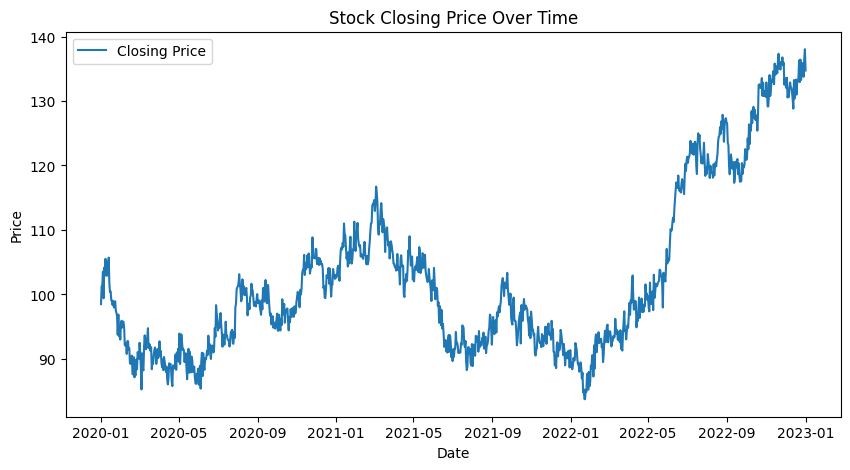

In [7]:
# Plot closing price over time
plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
3. Feature Engineering  

In [8]:
# Create a lag feature (previous day's close price)
stock_data['Close_Lag1'] = stock_data['Close'].shift(1)

In [9]:
# Create a rolling window feature (7-day moving average)
stock_data['Close_MA7'] = stock_data['Close'].rolling(window=7).mean()

In [10]:
# Drop NaN values caused by shifting/rolling
stock_data.dropna(inplace=True)

In [11]:
# Display updated dataset
print(stock_data.head())

                  Open       Close  Volume  Close_Lag1   Close_MA7
2020-01-07  103.640091  103.500501    2283  104.149253  101.671658
2020-01-08  104.407525  105.515708    1619  103.500501  102.674115
2020-01-09  103.938051  102.898145    1882  105.515708  102.906025
2020-01-10  104.480611  105.093385    1796  102.898145  103.440419
2020-01-11  104.017193  102.963778    4642  105.093385  103.359933


In [ ]:
4. Model Training

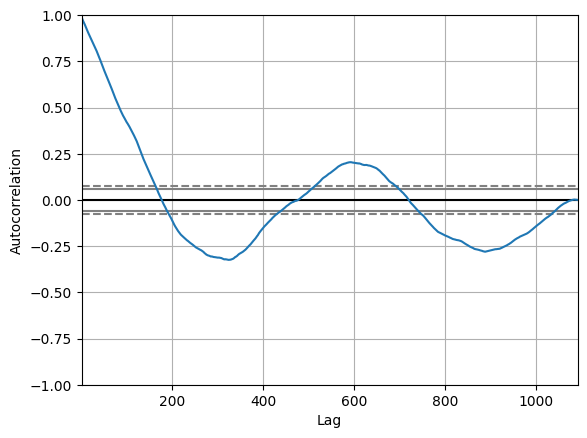

In [13]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Assuming stock_data is a DataFrame with a 'Close' column
autocorrelation_plot(stock_data['Close'])
plt.show()


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA Model
model = ARIMA(stock_data['Close'], order=(5,1,0))
model_fit = model.fit()


In [17]:
# Forecast
forecast = model_fit.forecast(steps=30)
forecast_dates = [stock_data.index[-1] + timedelta(days=i) for i in range(1, 31)]

NameError: name 'timedelta' is not defined